# Análise de dados com Python - Portal da Transparência

In [109]:
caminho_dados = 'dados/2024_Viagem.csv'

In [110]:
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.2f}'.format)

## Lendo os dados

In [111]:
df_viagens = pd.read_csv(caminho_dados, sep=';', decimal=',', encoding='windows-1252')

## Criando nova coluna de Despesas 

In [112]:
df_viagens['Despesas'] = df_viagens['Valor diárias'] + df_viagens['Valor passagens'] + df_viagens['Valor outros gastos']

## Ajustando valores nulos na coluna de cargo

In [113]:
df_viagens['Cargo'] = df_viagens['Cargo'].fillna('Cargo não informado')

## Convertendo colunas de datas

In [114]:
df_viagens["Período - Data de início"] = pd.to_datetime(df_viagens["Período - Data de início"], format='%d/%m/%Y', errors='coerce')
df_viagens["Período - Data de fim"] = pd.to_datetime(df_viagens["Período - Data de fim"], format='%d/%m/%Y', errors='coerce')

## Criando novas colunas de datas

In [115]:
# Nome do mês da Viagem
df_viagens['Mês da Viagem'] = df_viagens['Período - Data de início'].dt.month_name()

# Dias de duração da viagem
df_viagens['Dias de viagem'] = (df_viagens['Período - Data de fim'] - df_viagens['Período - Data de início']).dt.days

## Criando tabela consolidada

In [116]:
df_viagens_consolidada = (df_viagens
                          .groupby('Cargo')
                          .agg(
                              despesa_media=('Despesas', 'mean'),
                              duracao_media=('Dias de viagem', 'mean'),
                              despesas_totais=('Despesas', 'sum'),
                              destino_mais_frequente=('Destinos', pd.Series.mode),
                              n_viagens=('Nome', 'count')
                          )
                        .reset_index()
                        .sort_values(by='despesas_totais', ascending=False))

## Filtrando tabela consolidada por cargos relevantes (> 1% das Viagens)

In [117]:
df_cargos = df_viagens['Cargo'].value_counts(normalize=True).reset_index()
cargos_relevantes = df_cargos.loc[df_cargos['proportion'] > 0.01, 'Cargo']
filtro = df_viagens_consolidada['Cargo'].isin(cargos_relevantes)

## Chegando na tabela final - Consolidada e filtrada!

In [118]:
df_final = df_viagens_consolidada[filtro].sort_values(by='n_viagens', ascending=False)

## Tabela Consolidada

In [119]:
df_final

,Cargo,despesa_media,duracao_media,despesas_totais,destino_mais_frequente,n_viagens
340,Cargo não informado,3574.12,7.64,1094734704.08,Brasília/DF,306295
467,Informações protegidas por sigilo,3433.61,7.44,406079749.80,Informações protegidas por sigilo,118266
598,PROFESSOR DO MAGISTERIO SUPERIOR,2229.97,3.95,115697383.00,Brasília/DF,51883
599,PROFESSOR ENS BASICO TECN TECNOLOGICO,1523.97,2.37,53136267.88,Brasília/DF,34867
335,CONTRATADO LEI 8745/93 - NI,847.17,2.26,14570511.56,Fortaleza/CE,17199
229,AUDITOR FISCAL FEDERAL AGROPECUARIO,1549.41,2.07,25088021.78,Brasília/DF,16192
91,ANALISTA AMBIENTAL,2821.74,5.20,36592385.67,Brasília/DF,12968
230,AUDITOR-FISCAL DA RECEITA FEDERAL BRASIL,2935.65,3.14,32873453.29,Brasília/DF,11198
199,ASSISTENTE EM ADMINISTRAçãO,1518.00,2.31,15948157.02,Brasília/DF,10506
133,ANALISTA TRIBUTARIO REC FEDERAL BRASIL,2053.62,3.42,20595751.66,Brasília/DF,10029


## Gráficos

<Axes: title={'center': 'Número de Viagens por Cargo'}, xlabel='Cargo'>

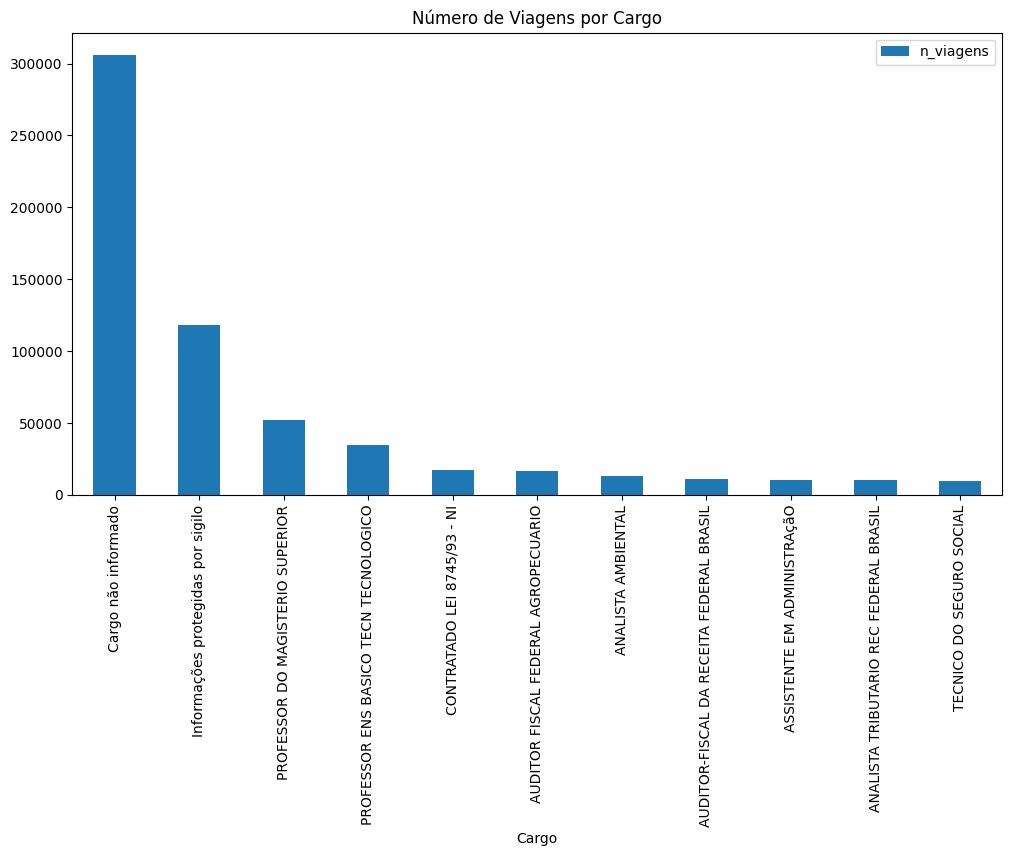

In [120]:
df_final.plot(x="Cargo", y="n_viagens", kind="bar", figsize=(12, 6), title="Número de Viagens por Cargo")

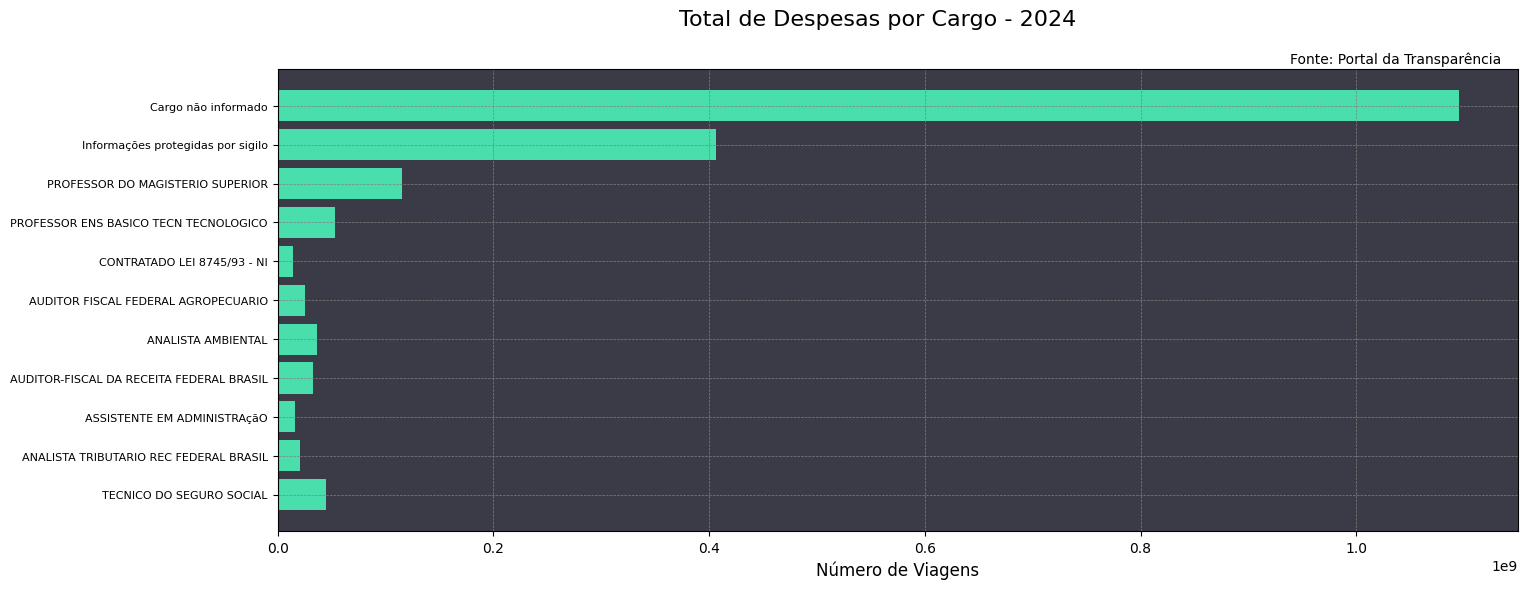

In [130]:
fig, ax = plt.subplots(figsize=(16, 6))

ax.barh(df_final['Cargo'], df_final['despesas_totais'], color='#49deac')
ax.invert_yaxis()
ax.set_facecolor('#3b3b47')

fig.suptitle('Total de Despesas por Cargo - 2024', fontsize=16)
plt.figtext(0.89, 0.89, 'Fonte: Portal da Transparência', fontsize=10, ha='right')

plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.yticks(fontsize=8)

plt.xlabel('Número de Viagens', fontsize=12)

plt.show()